# Import Packages

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import utils
import pandas as pd
import numpy as np
import math
import random

## Sales

In [2]:
query = 'SELECT * FROM `globus-datahub-dev.Verteiler_PoC.timeseries_sales_weekly` where Year >= 2016 order by sku, site_id, year, week desc'
sales_df_raw = utils.bq_to_dataframe(query, verbose=True).pipe(utils.reduce_memory_usage)

********************
Query Duration:  0:01:59.265974
Mem. usage decreased to 490.26 Mb (13.5% reduction)


In [3]:
sales_df = sales_df_raw.copy()

In [4]:
sales_df['Year_Week'] = sales_df.Year.astype(str) + sales_df.Week.astype(str)

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971519 entries, 0 to 2971518
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Week              int8   
 1   Year              int16  
 2   Site_ID           int16  
 3   SKU               int32  
 4   Sales_QTY         float32
 5   Season_Year       object 
 6   Vendor_ID         object 
 7   Vendor_Name       object 
 8   Article_Desc      object 
 9   Price_Level       object 
 10  Prodhier_ID       object 
 11  Prodhier_Desc     object 
 12  Mainsector_ID     object 
 13  Mainsector_Desc   object 
 14  Sector_ID         object 
 15  Sector_Desc       object 
 16  Warengruppe_ID    object 
 17  Subclass_Desc     object 
 18  Class_Desc        object 
 19  Web_Article       object 
 20  Web_Article_From  object 
 21  Web_Article_To    object 
 22  CENSHARE_CAT_1    object 
 23  CENSHARE_CAT_2    object 
 24  CENSHARE_CAT_3    object 
 25  Year_Week         object 
dtypes: float32(1),

## Stock

In [6]:
query = "SELECT * FROM `globus-datahub-dev.Verteiler_PoC.timeseries_stock_weekly` order by SKU, site_id, year, week desc"
stock_df = utils.bq_to_dataframe(query, verbose=True).pipe(utils.reduce_memory_usage)


********************
Query Duration:  0:00:31.742792
Mem. usage decreased to 20.76 Mb (52.5% reduction)


In [7]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145507 entries, 0 to 1145506
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   Week     1145507 non-null  int8   
 1   Year     1145507 non-null  int16  
 2   Site_ID  1145507 non-null  object 
 3   SKU      1145507 non-null  int32  
 4   Stock    1145507 non-null  float32
dtypes: float32(1), int16(1), int32(1), int8(1), object(1)
memory usage: 20.8+ MB


In [8]:
stock_df.sort_values(by=['SKU', 'Site_ID','Year','Week'])

,Week,Year,Site_ID,SKU,Stock
46,6,2019,g116,3082255,53.0
45,7,2019,g116,3082255,53.0
44,8,2019,g116,3082255,53.0
43,9,2019,g116,3082255,53.0
42,10,2019,g116,3082255,49.0
...,...,...,...,...,...
1145501,2,2021,g110,1290319506,2.0
1145504,1,2021,g115,1290319506,2.0
1145503,2,2021,g115,1290319506,2.0
1145506,1,2021,g116,1290319506,2.0


# Merge Sales and Stock Data

In [9]:
# Adjust data types for merge
sales_df['Site_ID'] = 'g' + sales_df.Site_ID.astype(str)

In [10]:
df = sales_df.merge(stock_df, how='left', on=['SKU', 'Week', 'Year', 'Site_ID'])
df

,Week,Year,Site_ID,SKU,Sales_QTY,Season_Year,Vendor_ID,Vendor_Name,Article_Desc,Price_Level,...,Subclass_Desc,Class_Desc,Web_Article,Web_Article_From,Web_Article_To,CENSHARE_CAT_1,CENSHARE_CAT_2,CENSHARE_CAT_3,Year_Week,Stock
0,52,2016,g101,2069466,2.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201652,NaN
1,51,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201651,NaN
2,50,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201650,NaN
3,49,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201649,NaN
4,48,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201648,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971514,2,2021,g116,1290319501,0.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 41",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20212,2.0
2971515,1,2021,g116,1290319501,1.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 41",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20211,2.0
2971516,2,2021,g116,1290319502,1.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 42",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20212,2.0
2971517,2,2021,g107,1290319506,0.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 40",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20212,2.0


# SKU, Vendor, Season_Year - Data Exploration

In [11]:
df.SKU.drop_duplicates().count()

6253

In [12]:
df[['SKU', 'Season_Year', 'Vendor_Name']].drop_duplicates().Season_Year.value_counts()

9999    3875
2020    2126
2021     200
2018      23
2019      23
2017       5
2016       1
Name: Season_Year, dtype: int64

In [13]:
print('Number of vendors: ', df.Vendor_Name.drop_duplicates().count())
print('\nSummary:\n ',df[['SKU', 'Season_Year', 'Vendor_Name']].drop_duplicates().Vendor_Name.value_counts().head(25))

Number of vendors:  112

Summary:
  RALPH LAUREN GERMANY GMBH     913
Tommy Hilfiger Europe BV      581
BRAX                          501
Zimmerli Textil AG            268
Eton AB                       262
Hanro AG                      228
Diesel S.p.A.                 217
Isa Seta SPA                  215
Strellson AG                  199
Fashion Box Switzerland AG    180
Fibretex SPA                  164
FOSTER SPA                    140
Calvin Klein Europe BV        138
Dagsmejan Ventures AG         119
Confezioni Damap SRL          115
Allsaints Wholesale Ltd.      114
Corinus AG Fashion Group      111
Tiger of Sweden               106
RAGMAN TEXTILHANDEL GMBH       99
Swiss Hest GmbH                86
Paul Smith Ltd                 71
Derek Rose Ltd                 69
Orlebar Brown Ltd              59
Tateossian Ltd.                52
Santoni S.P.A.                 48
Name: Vendor_Name, dtype: int64


# Sales - Data Exploration

In [14]:
# Overall
print('Mean: ', df.Sales_QTY.mean())
print('Std.: ', df.Sales_QTY.std())
print('\nDeciles:\n', df.Sales_QTY.quantile(np.arange(0, 1.1, 0.1)))

Mean:  0.12236267
Std.:  0.58812904

Deciles:
 0.0   -30.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     0.0
0.9     0.0
1.0    65.0
Name: Sales_QTY, dtype: float64


In [15]:
# Basic-Articles
print('Mean: ', df.loc[df.Season_Year == '9999'].Sales_QTY.mean())
print('Std.: ', df.loc[df.Season_Year == '9999'].Sales_QTY.std())
print('\nDeciles:\n', df.loc[df.Season_Year == '9999'].Sales_QTY.quantile(np.arange(0, 1.1, 0.1)))

Mean:  0.12763932
Std.:  0.6089992

Deciles:
 0.0   -30.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     0.0
0.9     0.0
1.0    65.0
Name: Sales_QTY, dtype: float64


In [16]:
# Seasonal Articles
print('Mean: ', df.loc[df.Season_Year != '9999'].Sales_QTY.mean())
print('Std.: ', df.loc[df.Season_Year != '9999'].Sales_QTY.std())
print('\nDeciles:\n', df.loc[df.Season_Year != '9999'].Sales_QTY.quantile(np.arange(0, 1.1, 0.1)))

Mean:  0.07341366
Std.:  0.33387882

Deciles:
 0.0    -3.0
0.1     0.0
0.2     0.0
0.3     0.0
0.4     0.0
0.5     0.0
0.6     0.0
0.7     0.0
0.8     0.0
0.9     0.0
1.0    12.0
Name: Sales_QTY, dtype: float64


In [17]:
df

,Week,Year,Site_ID,SKU,Sales_QTY,Season_Year,Vendor_ID,Vendor_Name,Article_Desc,Price_Level,...,Subclass_Desc,Class_Desc,Web_Article,Web_Article_From,Web_Article_To,CENSHARE_CAT_1,CENSHARE_CAT_2,CENSHARE_CAT_3,Year_Week,Stock
0,52,2016,g101,2069466,2.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201652,NaN
1,51,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201651,NaN
2,50,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201650,NaN
3,49,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201649,NaN
4,48,2016,g101,2069466,0.0,9999,0000194449,Hanro AG,HANRO SLIP 3501 S WEISS,obere Preislage,...,Initial,Slip,X,2014-02-10,2020-11-17,Herren,Wasche/Pyjamas,slip,201648,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971514,2,2021,g116,1290319501,0.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 41",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20212,2.0
2971515,1,2021,g116,1290319501,1.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 41",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20211,2.0
2971516,2,2021,g116,1290319502,1.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 42",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20212,2.0
2971517,2,2021,g107,1290319506,0.0,9999,0000949099,Rudolf Roth AG,"NOS_COLLONIL FAMACO CÈDRE SC, nature, 40",obere Preislage,...,Schuhzubehör,Furnituren,X,2020-12-28,9999-12-31,Damen Accessoires,Schuhpflege,schuhzubehoer,20212,2.0


# Plot Time-Series

In [18]:
def plot_timeseries(samples: int, sales: pd.core.frame.DataFrame) -> None:
    """
    Vizualize certain timeseries.
    :param: samples: list of lists with Site ID - Article combinations to be vizualized.
            Example: [['g590', 1282277826], ['g115', 1254150002], ['g102', 1264627019]]
    :param: sales: DataFrame containing the sales data (columns SKU, Site_ID & Year_Week required)
    :return None
    """
    fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 1.5))
    axs = axs.flatten()
    ax_idx = 0

    for site, article in samples:
        df_article = sales.loc[df.SKU == article].loc[df.Site_ID == site].sort_values(by='Year_Week').reset_index()

        df_article.plot(x='Year_Week',
                     y='Sales_QTY',
                     title= f'SKU: {article}, Site ID: {site}',
                     ax=axs[ax_idx])
        ax_idx += 1

    plt.tight_layout()
    plt.show()

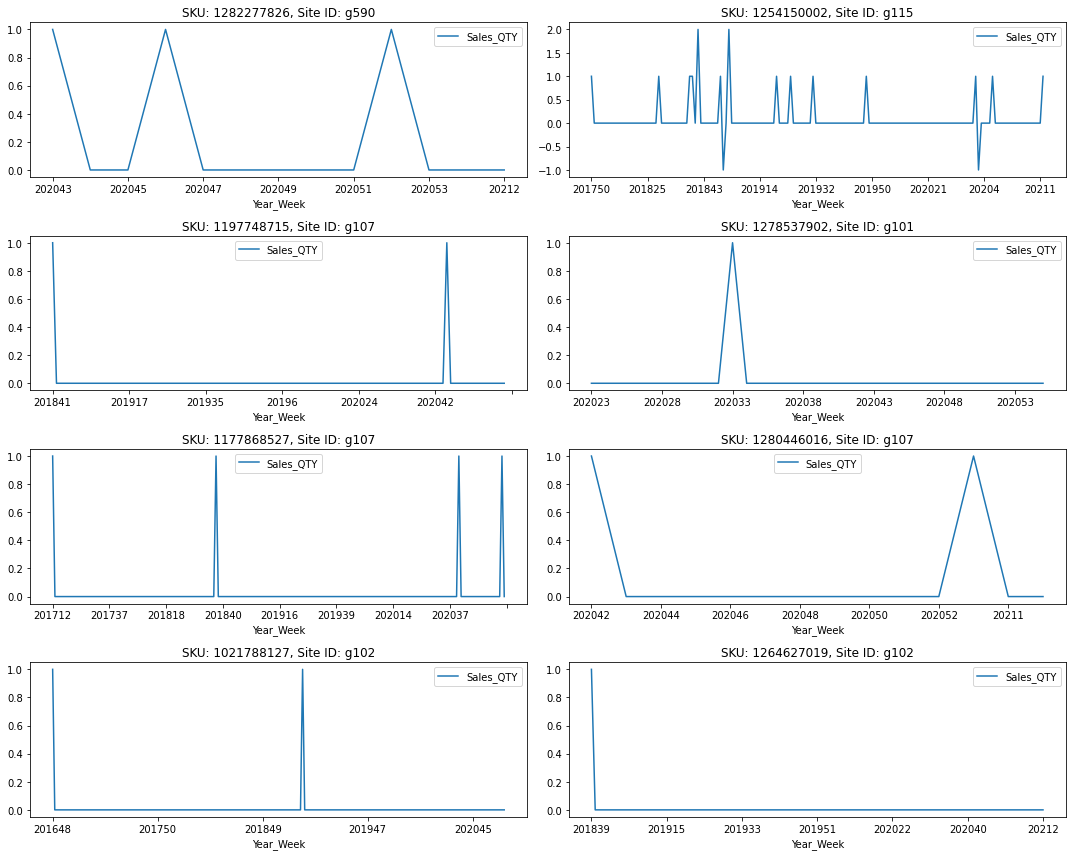

In [19]:
n_series = 8

samples = df[['Site_ID','SKU']].drop_duplicates().sample(n=n_series, random_state=4).values.tolist()

plot_timeseries(samples, df)

# Plot Time Series for Top-Sellers

In [20]:
# Get SKU / Store combinations with a mean sale greater a threshold
top_sellers_mean = df[['Site_ID', 'SKU', 'Sales_QTY']].groupby(['Site_ID', 'SKU']).mean() 
top_sellers_mean = top_sellers_mean.loc[top_sellers_mean.Sales_QTY > 0.2]
top_sellers_mean

Sales_QTY
Site_ID SKU                  
g101    2069466      0.212928
        2069474      0.893536
        2069482      0.870722
        2069490      0.201521
        2069505      0.513308
...                       ...
g590    1288934414   0.333333
        1288934415   0.250000
        1289345604   0.500000
        1289959504   0.333333
        1290305201   2.000000

[4438 rows x 1 columns]

In [21]:
# Get SKU / Store combinations which timeseries is longer than a threshold
top_sellers_length = df[['Site_ID', 'SKU', 'Sales_QTY']].loc[df.Sales_QTY > 0].groupby(['Site_ID', 'SKU']).count()
top_sellers_length = top_sellers_length.loc[top_sellers_length.Sales_QTY > 8]
top_sellers_length

Sales_QTY
Site_ID SKU                  
g101    2069466            29
        2069474            88
        2069482            66
        2069490            27
        2069505            55
...                       ...
g590    1283465801          9
        1283465804         10
        1284233102         12
        1284234802          9
        1286631504         10

[7056 rows x 1 columns]

In [22]:
# select only SKUs that meet both requirements 
top_sellers = top_sellers_mean.merge(top_sellers_length, how='inner', on=['Site_ID', 'SKU'])
top_sellers = top_sellers.reset_index(drop=False)[['Site_ID', 'SKU']]
top_sellers

,Site_ID,SKU
0,g101,2069466
1,g101,2069474
2,g101,2069482
3,g101,2069490
4,g101,2069505
...,...,...
1817,g590,1283465801
1818,g590,1283465804
1819,g590,1284233102
1820,g590,1284234802


In [23]:
# Print number of articles that are top sellers (it at least one store)
len(top_sellers.SKU.drop_duplicates())

715

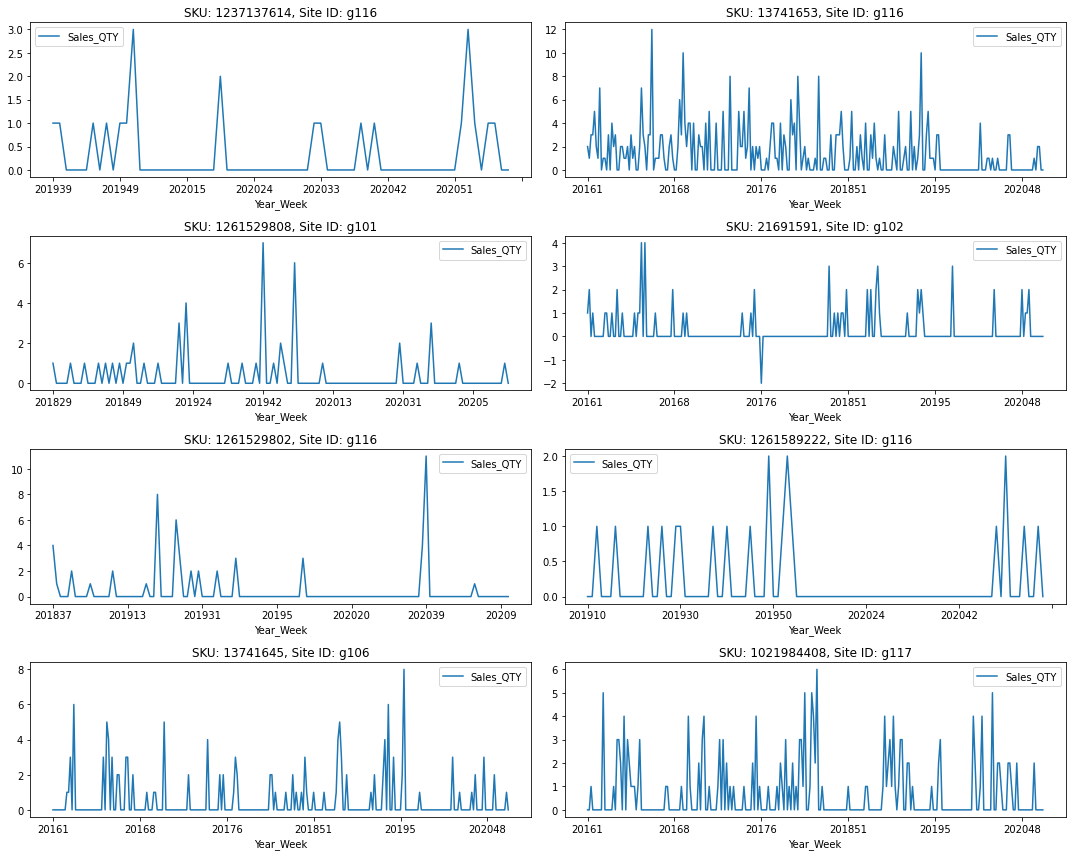

In [24]:
n_series = 8

samples = top_sellers.sample(n=n_series, random_state=1).values.tolist()

plot_timeseries(samples, df)

# Plot Time Series of Aggregated Sales

In [40]:
def plot_aggregated_timeseries(df, kv):
    d = df.copy()
    for key,value in kv:
        d = d.loc[d[key] == value]

        if d.empty:
            print(f'WARNING: DataFrame does not contain any rows after filtering for {k} == {v}')

    a = pd.pivot_table(d, values='Sales_QTY', index=['Year_Week'], aggfunc=np.mean)
    a.reset_index(level='Year_Week', inplace=False)
    ax = a.Sales_QTY.plot(
        title=' & '.join([f'{k} = {v}' for k,v in kv]),
        figsize=(12,4)
                                           
    )



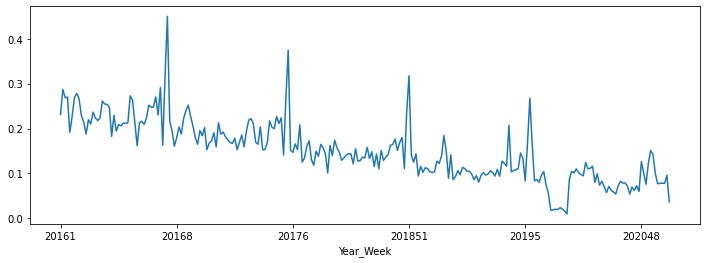

In [41]:
# Total Sale
plot_aggregated_timeseries(df, [])

In [30]:
df.CENSHARE_CAT_2.drop_duplicates()

0                       Wasche/Pyjamas
48526                           Socken
107783                    Portemonnaie
181972                 Pullover&Strick
326085                            None
463200                          Hemden
489293              Shirts&Tops&Sweats
829892                          Gurtel
942546                           Jeans
1104626                         Mantel
1127368                        Vestons
1132449                          Hosen
1388066                     Handschuhe
1422645                Kopfbedeckungen
1920607                         Schuhe
2103048                  Westen&Gilets
2106490                        Taschen
2131280    Krawatten&Fliegen&Pochetten
2144434                    Schuhpflege
2490525      Lederjacken & Ledermantel
2510991                       Bademode
2560436                         Schals
2562606                         Jacken
2669752                Shorts&Bermudas
2723746          Strand- & Sporttucher
2927881              Mans

In [31]:
df.CENSHARE_CAT_3.drop_duplicates()

0                    slip
16227         boxershorts
32465        shirtkurzarm
48526              socken
50246             tanktop
                ...      
2968021     schlusseletui
2969520       schutzmaske
2971303      schuhzubehor
2971475    krawattennadel
2971513     schuhzubehoer
Name: CENSHARE_CAT_3, Length: 127, dtype: object

In [34]:
df.Web_Article.value_counts()

X    2955619
       15900
Name: Web_Article, dtype: int64

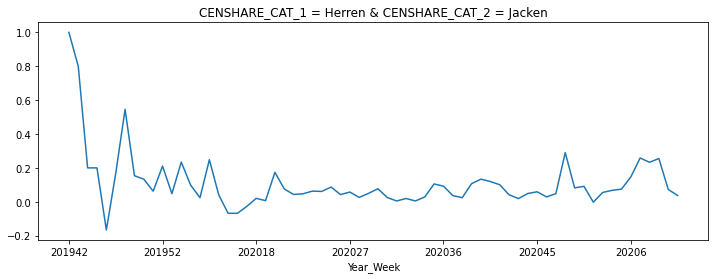

In [42]:
key_values =  [('CENSHARE_CAT_1', 'Herren'),('CENSHARE_CAT_2', 'Jacken')]

plot_aggregated_timeseries(df, key_values)

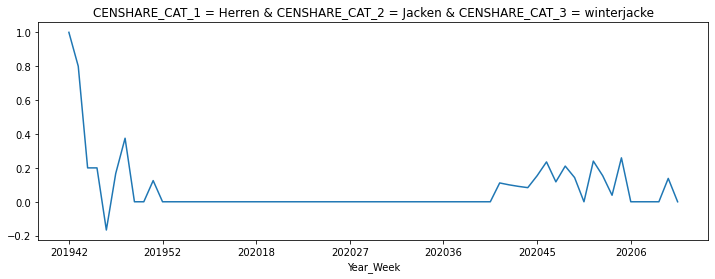

In [43]:
key_values =  [('CENSHARE_CAT_1', 'Herren'),('CENSHARE_CAT_2', 'Jacken'),('CENSHARE_CAT_3', 'winterjacke')]

plot_aggregated_timeseries(df, key_values)